# Below the original images together with two feature transformations are performed. This notebook is for comparison pre-processing pipelines.

The general idea is that the images differ mainly in brightness and color balances, thus a preprocesisng pipeline should attemp to normalize this. 

Also, the disease of DRD is mainly seen as small black dots in the eye. Thus not affected by a less degree of red and likely enhanced by normalized brightness. 

In the tensorflow input pipeline, the black area will be decreased through a fractional size decrease of 0.9. Also the data will be augmented through random flipping and and rotation.

Any further augmentation in the tensorflow pipeline, such as random brightness or contrast manipulations will be removed.

In [116]:
from matplotlib.pyplot import imshow
import os 
import tensorflow as tf
import numpy as np
import PIL as pil
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [117]:
data_dir = '/home/olle/PycharmProjects/Diabetic_Retinopathy_Detection/data/sample/'

In [118]:
filenames = os.listdir(data_dir)

In [119]:
images = []
for img_path in filenames:
    im = Image.open(data_dir + img_path)
    images.append(np.asarray(im))

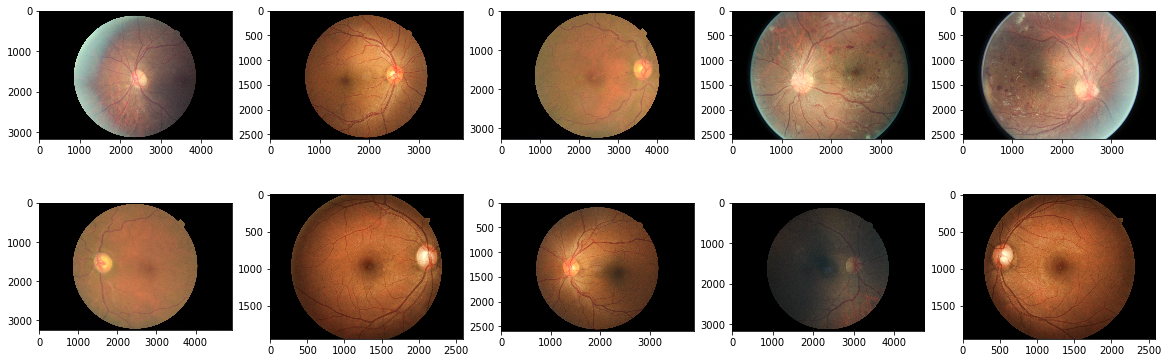

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline

images = []
for img_path in filenames:
    im = Image.open(data_dir + img_path)
    images.append(np.asarray(im))
    
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [65]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
 
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

def data_list(data_dir, label_dir):
    '''
    imports: pandas, os, numpy, PIL
    '''
    #get labels csv into pandas df
    #below line assumes 
    label_file_name = os.listdir(label_dir)[0]
    label_pd = pd.read_csv(label_dir + label_file_name)
    #initilize container list
    data = [[],[],[]]
    #get filenames om images
    filenames = os.listdir(data_dir)
    #below loop retrieved the 
    for im_name in filenames:
        #all in one
        img = cv2.imread(data_dir+im_name, 1)
        #-----Converting image to LAB Color model----------------------------------- 
        lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        #-----Splitting the LAB image to different channels-------------------------
        l, a, b = cv2.split(lab)
        #-----Applying CLAHE to L-channel-------------------------------------------
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
        cl = clahe.apply(l)
        #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
        limg = cv2.merge((cl,a,b))
        #-----Converting image from LAB Color model to RGB model--------------------
        im = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
        img_adj = adjust_gamma(img, gamma=2)
        name = im_name.replace(".jpeg", "")
        label = label_pd.loc[label_pd['image'] == name].iloc[0]['level']
        data[0].append(name)
        data[1].append(img_adj)
        data[2].append(label)
        
    return(data)

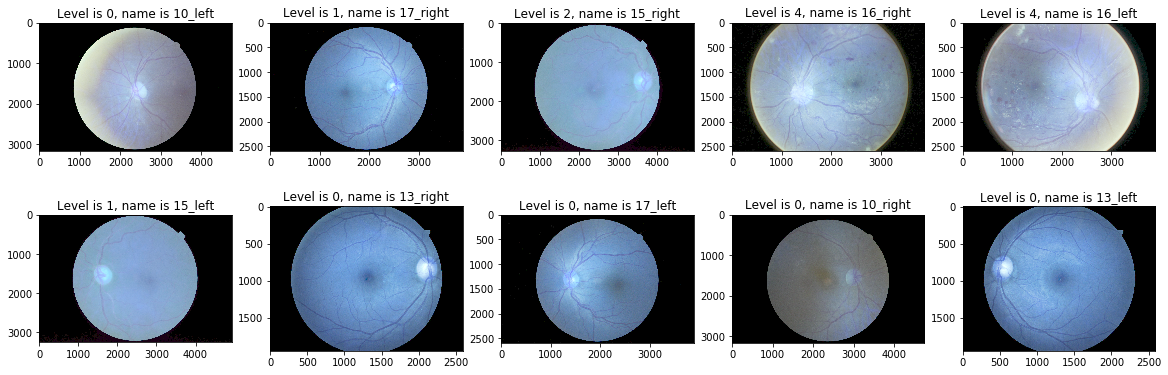

In [66]:
%matplotlib inline
label_dir = '/home/olle/PycharmProjects/Diabetic_Retinopathy_Detection/data/labels/'
data_dir = '/home/olle/PycharmProjects/Diabetic_Retinopathy_Detection/data/sample/'
data = data_list(data_dir, label_dir)
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(data[1]):
    ax = plt.subplot(len(data[1]) / columns + 1, columns, i + 1)
    ax.set_title("Level is {}, name is {}".format(data[2][i], data[0][i]))
    ax.imshow(image)

In [113]:
def data_list(data_dir, label_dir):
    '''
    imports: pandas, os, numpy, PIL
    '''
    from PIL import Image, ImageEnhance

    #get labels csv into pandas df
    #below line assumes 
    label_file_name = os.listdir(label_dir)[0]
    label_pd = pd.read_csv(label_dir + label_file_name)
    #initilize container list
    data = [[],[],[]]
    #get filenames om images
    filenames = os.listdir(data_dir)
    #below loop retrieved the 
    for im_name in filenames:
        img = Image.open(data_dir + im_name)
        contrast = ImageEnhance.Contrast(img)
        img_contr = contrast.enhance(2)
        color = ImageEnhance.Color(img_contr)
        img_contr = color.enhance(0.4)
        brightness = ImageEnhance.Brightness(img_contr)
        img_bright = brightness.enhance(1)
        sharpness = ImageEnhance.Sharpness(img_bright)
        img_sharp = sharpness.enhance(2)
        name = im_name.replace(".jpeg", "")
        label = label_pd.loc[label_pd['image'] == name].iloc[0]['level']
        data[0].append(name)
        data[1].append(img_sharp)
        data[2].append(label)
        
    return(data)

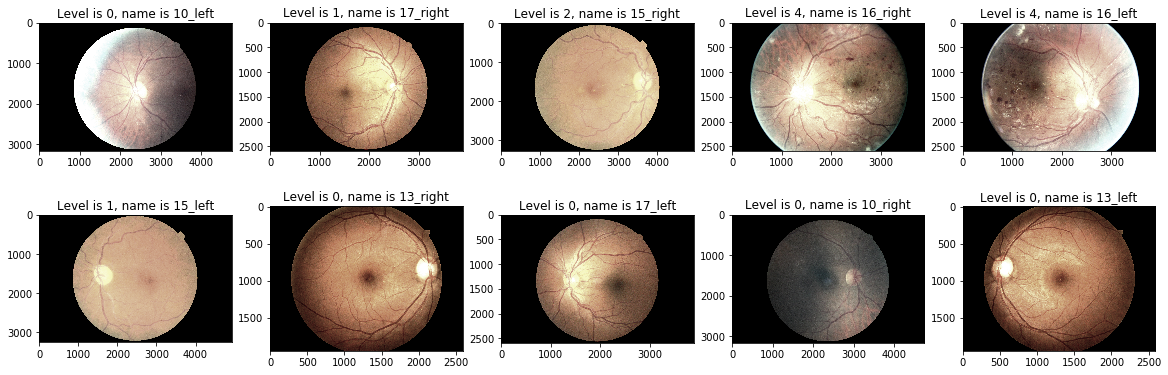

In [114]:
%matplotlib inline
label_dir = '/home/olle/PycharmProjects/Diabetic_Retinopathy_Detection/data/labels/'
data_dir = '/home/olle/PycharmProjects/Diabetic_Retinopathy_Detection/data/sample/'
data = data_list(data_dir, label_dir)
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(data[1]):
    ax = plt.subplot(len(data[1]) / columns + 1, columns, i + 1)
    ax.set_title("Level is {}, name is {}".format(data[2][i], data[0][i]))
    ax.imshow(image)